<a href="https://colab.research.google.com/github/raresrosca/Autoencoder/blob/master/Conv_Autoencoder_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image


In [15]:
# Loading and Transforming data

# batch size
BS_train = 32
BS_test = 4

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5),
                                                    (0.5, 0.5, 0.5))])

trainset = tv.datasets.CIFAR10(root = '/content/data',
                              train = True, download = True, transform = transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size = BS_train, shuffle = True, num_workers = 4)

testset = tv.datasets.CIFAR10(root = '/content/data',
                             train = False, download = True, transform = transform)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

testloader = torch.utils.data.DataLoader(testset, batch_size = BS_test, shuffle = False, num_workers = 2)

Files already downloaded and verified
Files already downloaded and verified


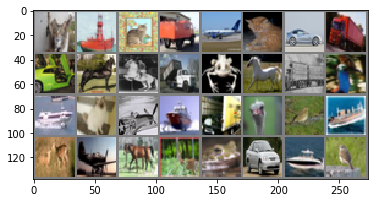

  cat  ship   cat truck


In [16]:
# Let us plot some of the training images to aid visualisation

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()
  
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#show images

imshow(tv.utils.make_grid(images))

#print labels

print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


In [0]:
# Writing our model

class Autoencoder(nn.Module):
  
  def __init__(self):
    super(Autoencoder, self).__init__()
    
    self.encoder = nn.Sequential( 
        nn.Conv2d(in_channels = 3, out_channels = 6, kernel_size = 5),
        nn.ReLU(True),
        nn.Conv2d(6, 16, kernel_size = 5),
        nn.ReLU(True),
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(
        nn.ConvTranspose2d(16, 6, kernel_size = 5),
        nn.ReLU(True),
        nn.ConvTranspose2d(6, 3, kernel_size = 5),
        nn.ReLU(True),
        nn.Sigmoid())
    
  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x
      
        
        
      

In [0]:
# defining some parameters

num_epochs = 100 

batch_size = 128

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
model = Autoencoder().to(device)

distance = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), weight_decay = 1e-5)

In [44]:
for epoch in range(num_epochs):
  for data in dataloader:
    img, _ = data
    img = Variable(img).to(device)
    # forward pass
    
    output = model(img)
    loss = distance(output, img)
    
    # backward pass
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
  #log
  print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))


epoch [1/100], loss:0.7259
epoch [2/100], loss:0.5073
epoch [3/100], loss:0.6269
epoch [4/100], loss:0.6060
epoch [5/100], loss:0.5351
epoch [6/100], loss:0.5491
epoch [7/100], loss:0.6324
epoch [8/100], loss:0.5277
epoch [9/100], loss:0.5285
epoch [10/100], loss:0.5136
epoch [11/100], loss:0.4539
epoch [12/100], loss:0.6025
epoch [13/100], loss:0.5887
epoch [14/100], loss:0.5790
epoch [15/100], loss:0.5336
epoch [16/100], loss:0.5558
epoch [17/100], loss:0.5277
epoch [18/100], loss:0.5734
epoch [19/100], loss:0.5546
epoch [20/100], loss:0.6035
epoch [21/100], loss:0.6916
epoch [22/100], loss:0.4895
epoch [23/100], loss:0.5294
epoch [24/100], loss:0.5571
epoch [25/100], loss:0.6583
epoch [26/100], loss:0.5326
epoch [27/100], loss:0.5959
epoch [28/100], loss:0.4632
epoch [29/100], loss:0.5527
epoch [30/100], loss:0.6960
epoch [31/100], loss:0.5763
epoch [32/100], loss:0.5332
epoch [33/100], loss:0.5084
epoch [34/100], loss:0.6321
epoch [35/100], loss:0.5264
epoch [36/100], loss:0.5386
e

In [0]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

In [0]:
#Save model parameters
torch.save(model.state_dict(), 'params')

In [41]:
#Save the whole model
torch.save(model, 'model_1')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
